In [1]:
%%capture
%pip install pandas
%pip install matplotlib
%pip install seaborn
%pip install tensorflow
%pip install sklearn

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.datasets import cifar10
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from PIL import Image

from sklearn.metrics import confusion_matrix

In [3]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [4]:
X_train.shape, X_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [5]:
y_train.shape, y_test.shape

((50000, 1), (10000, 1))

## Data Visualization

[7]


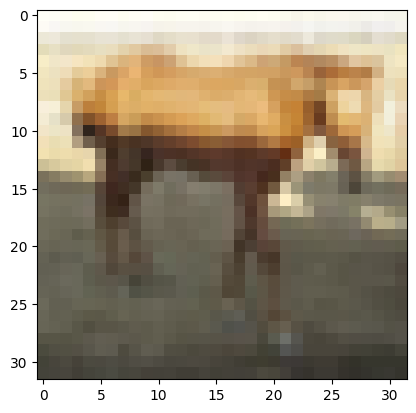

In [6]:
plt.imshow(X_train[2000])
print(y_train[2000])

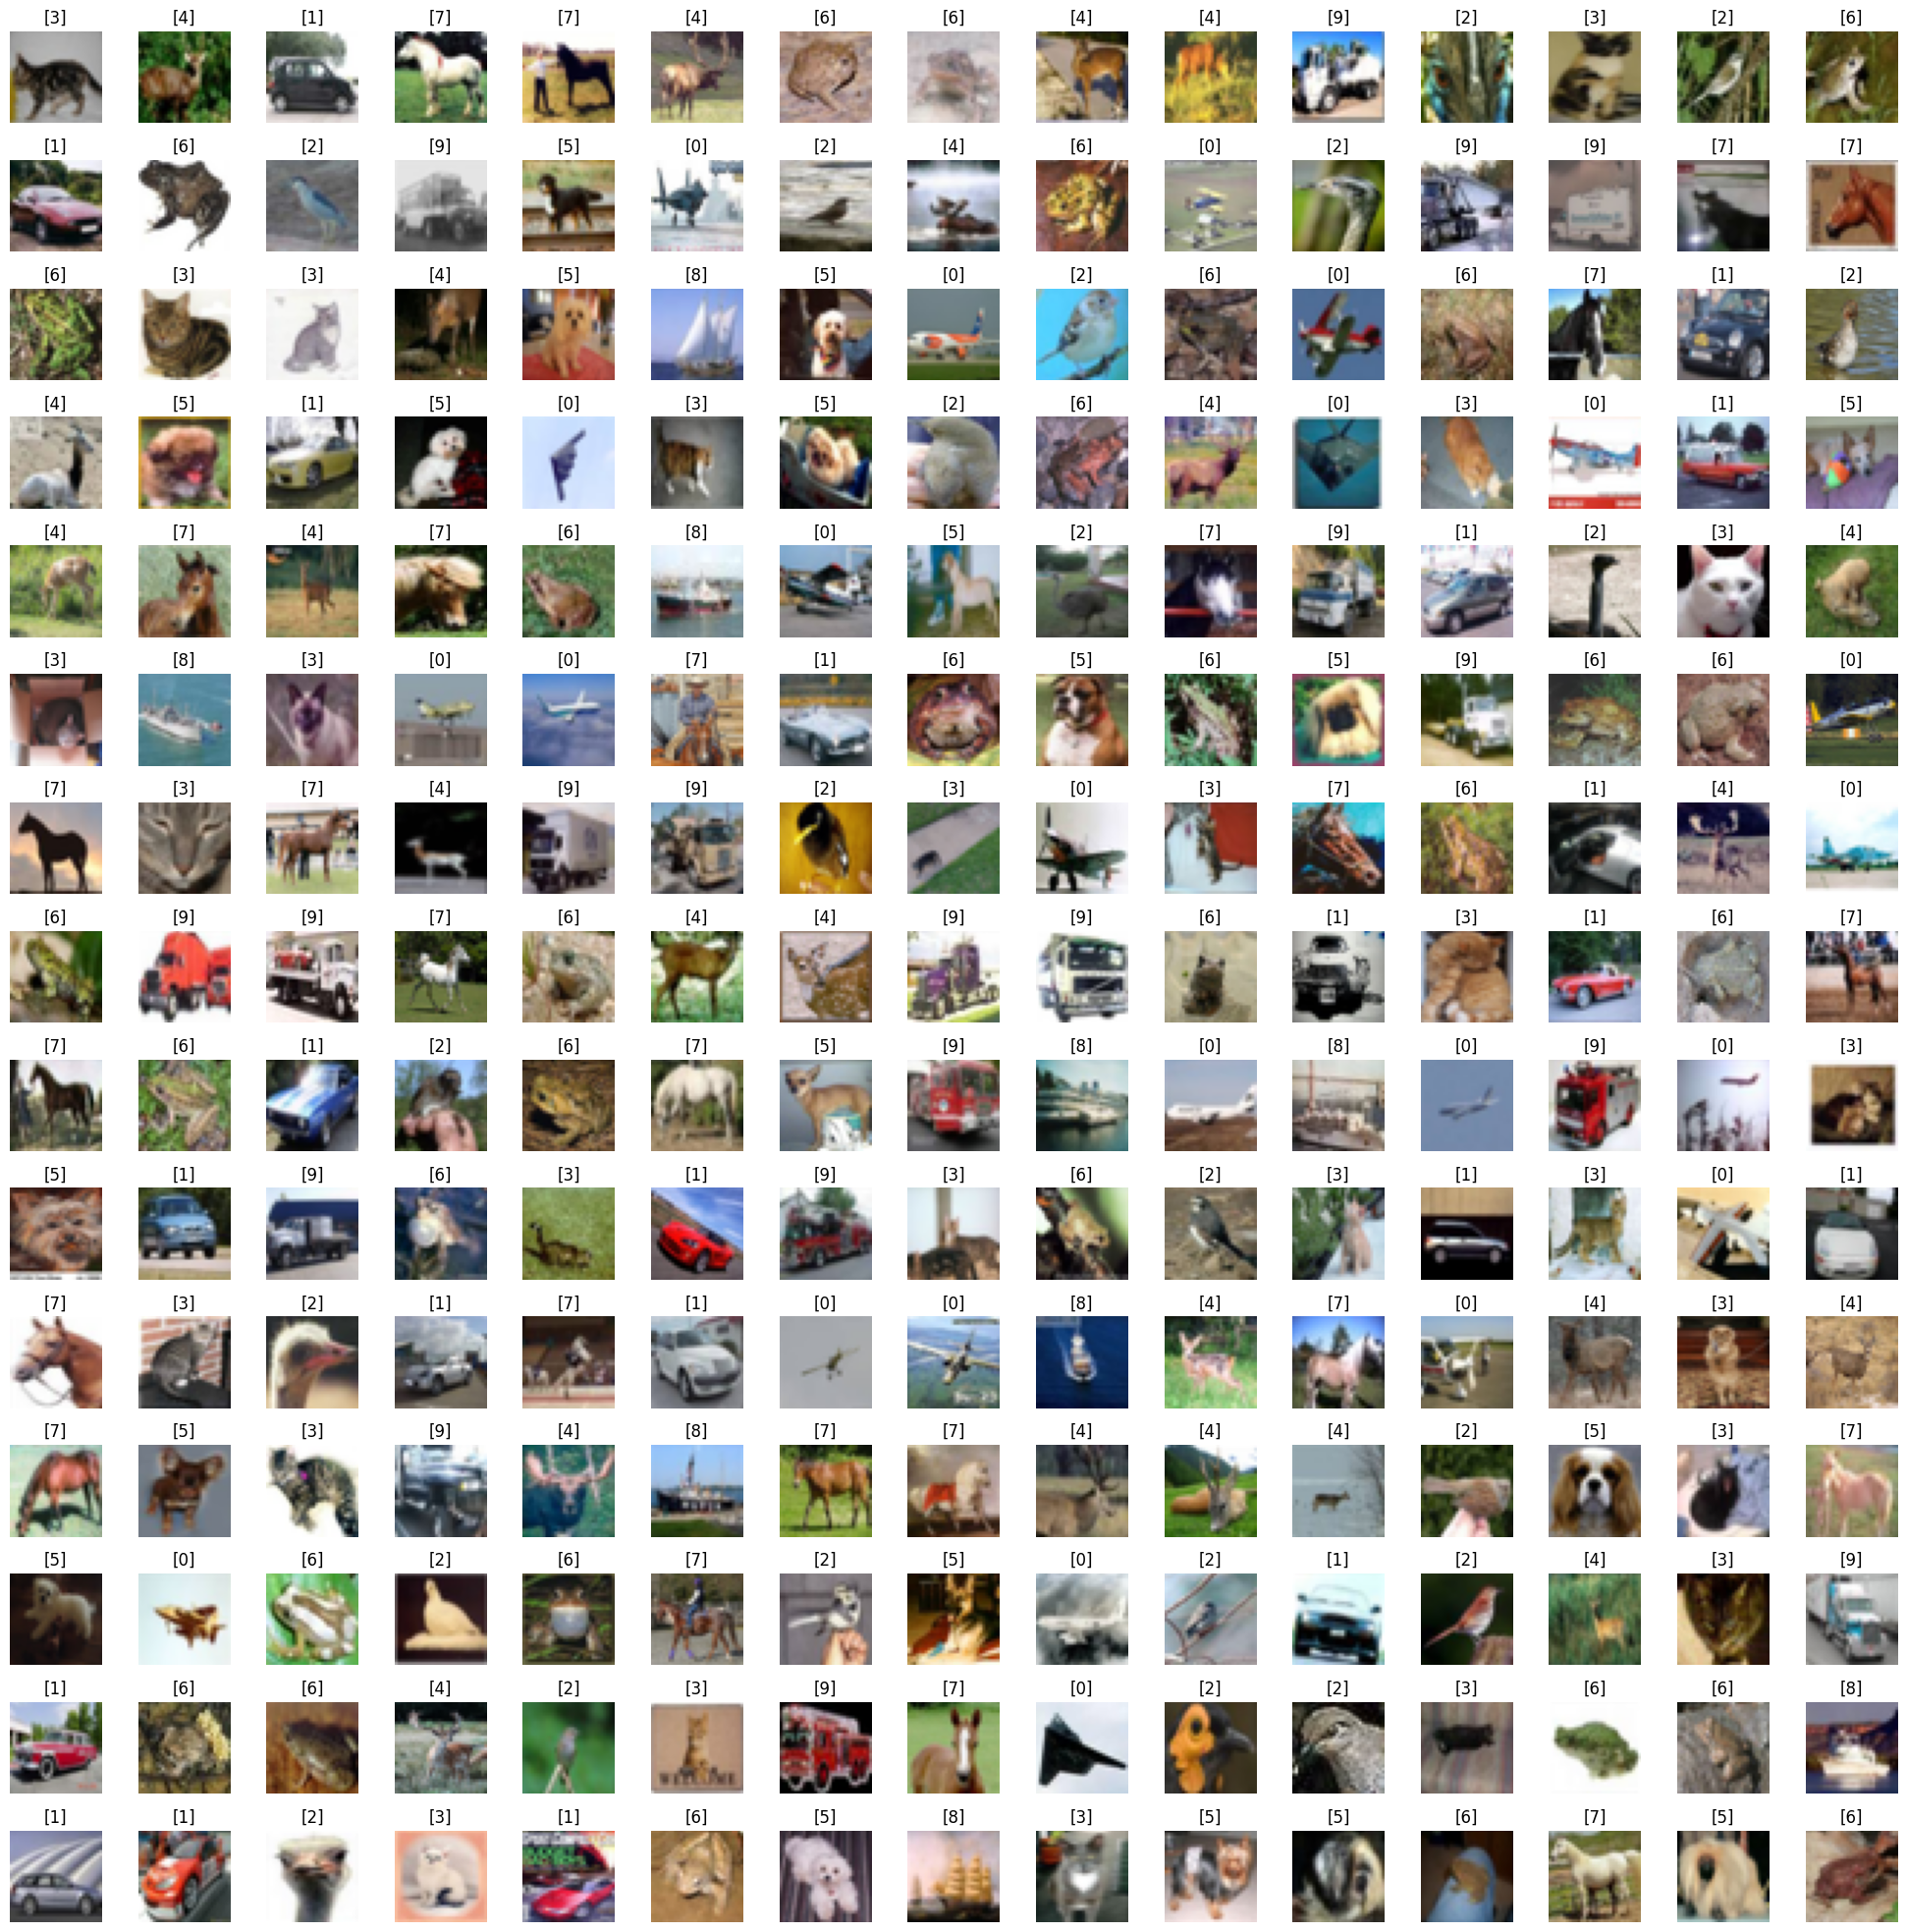

In [7]:
L_grid = 15
W_grid = 15
fig, axes = plt.subplots(L_grid, W_grid, figsize=(25, 25))
axes = axes.ravel() # Flatten
n_training = len(X_train)

for i in np.arange(0, L_grid * W_grid):
    index = np.random.randint(0, n_training)
    axes[i].imshow(X_train[index])
    axes[i].axis('off')
    axes[i].set_title(y_train[index])
plt.subplots_adjust(hspace=0.4)

In [8]:
n_training

50000

## Data Preparation

In [9]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [10]:
number_cat = 10

In [11]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [12]:
y_train = keras.utils.to_categorical(y_train, number_cat)
y_test = keras.utils.to_categorical(y_test, number_cat)

In [13]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [14]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [15]:
X_train = X_train / 255
X_test = X_test / 255

In [16]:
X_train[:1]

array([[[[0.23137255, 0.24313726, 0.24705882],
         [0.16862746, 0.18039216, 0.1764706 ],
         [0.19607843, 0.1882353 , 0.16862746],
         ...,
         [0.61960787, 0.5176471 , 0.42352942],
         [0.59607846, 0.49019608, 0.4       ],
         [0.5803922 , 0.4862745 , 0.40392157]],

        [[0.0627451 , 0.07843138, 0.07843138],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509805, 0.21568628],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117648, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215687, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941177, 0.19607843],
         [0.47058824, 0.32941177, 0.19607843],
         [0.42745098, 0.28627452, 0.16470589]],

        ...,

        [[0.8156863 , 0.6666667 , 0.3764706 ],
         [0.7882353 , 0.6       , 0.13333334]

In [17]:
X_train.shape

(50000, 32, 32, 3)

In [18]:
input_shape = X_train.shape[1:]

In [19]:
input_shape

(32, 32, 3)

## Model Training

In [20]:
cnn_model = Sequential()
cnn_model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
cnn_model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Dropout(0.4))

cnn_model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
cnn_model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Dropout(0.2))

cnn_model.add(Flatten())
cnn_model.add(Dense(units=1024, activation='relu'))
cnn_model.add(Dense(units=1024, activation='relu'))

cnn_model.add(Dense(units=number_cat, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
cnn_model.compile(loss='categorical_crossentropy', optimizer=RMSprop(learning_rate=0.0001), metrics=['accuracy'])

In [22]:
history = cnn_model.fit(X_train, y_train, batch_size=32, epochs=20, shuffle=True)

Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.2843 - loss: 1.9367
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4983 - loss: 1.3906
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5760 - loss: 1.1923
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6395 - loss: 1.0306
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6831 - loss: 0.9074
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7168 - loss: 0.8141
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7498 - loss: 0.7252
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7744 - loss: 0.6467
Epoch 9/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7941 - loss: 0.5868
Epoch 10/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8146 - loss: 0.5345
Epoch 11/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8347 - loss: 0.4727
Epoch 12/20
1563/1563 ━━━━━━━

## Evalulate the model

In [23]:
cnn_model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7909 - loss: 0.8706


[0.8921987414360046, 0.7839000225067139]

In [24]:
preds = cnn_model.predict(X_test)
preds

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


array([[3.0825242e-05, 2.0964169e-05, 1.5260931e-04, ..., 1.6513050e-07,
        2.1672115e-05, 2.8123216e-08],
       [1.9206081e-07, 7.1735085e-05, 2.3309041e-12, ..., 3.0461448e-15,
        9.9992788e-01, 2.3384757e-07],
       [1.8376908e-03, 4.3742286e-04, 1.3235183e-06, ..., 3.1920374e-07,
        9.9704450e-01, 6.7530380e-04],
       ...,
       [1.0217887e-09, 1.8851982e-09, 1.0358580e-06, ..., 1.1387355e-06,
        4.6242783e-09, 1.5362316e-09],
       [1.7874019e-02, 7.4509257e-01, 8.6885702e-04, ..., 9.4648640e-05,
        3.6741889e-07, 1.2303979e-05],
       [1.6519932e-15, 5.9838954e-17, 4.2402839e-12, ..., 9.9999893e-01,
        1.9633082e-17, 7.5047177e-16]], dtype=float32)

In [25]:
predicted_classes = np.argmax(preds, axis=1)
predicted_classes

array([3, 8, 8, ..., 5, 1, 7])

In [26]:
y_test = np.argmax(y_test, axis=1)
y_test

array([3, 8, 8, ..., 5, 1, 7])

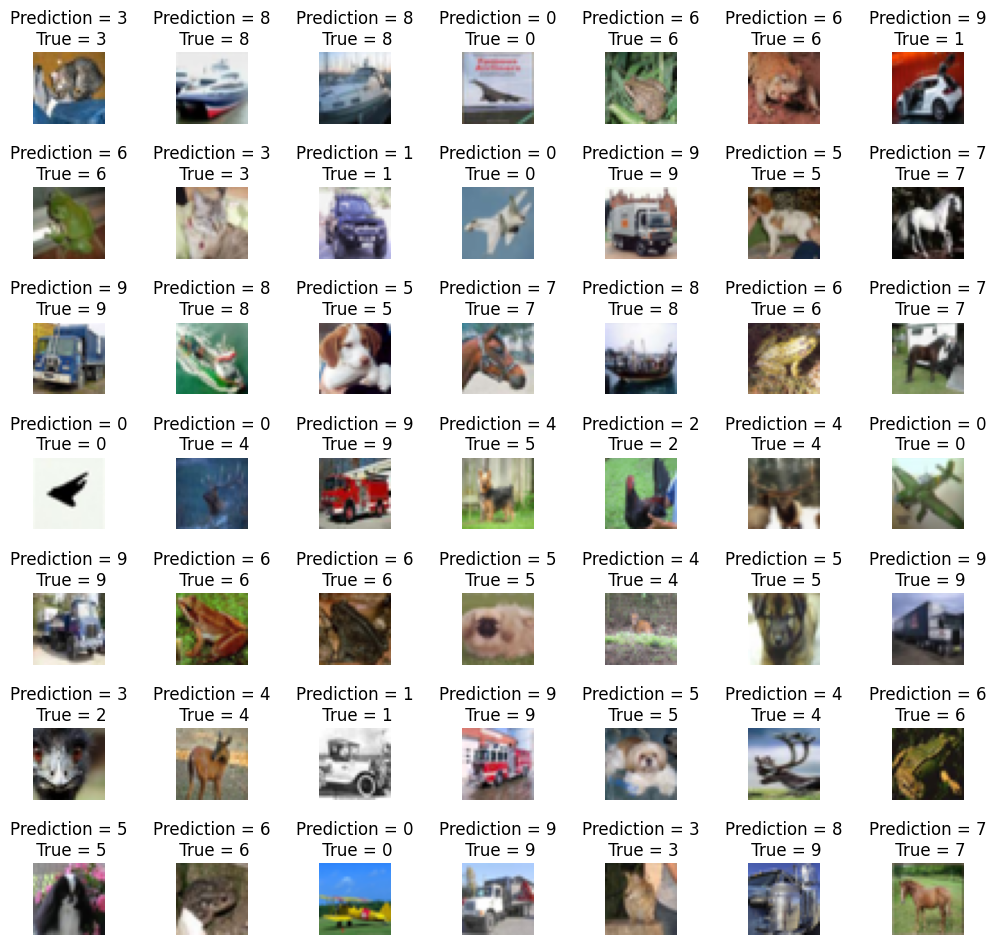

In [27]:
L = 7
W = 7

fig, axes = plt.subplots(L, W, figsize=(12, 12))
axes = axes.ravel()

for i in np.arange(0, L * W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(predicted_classes[i], y_test[i]))
    axes[i].axis('off')
plt.subplots_adjust(wspace=1)

In [28]:
cm = confusion_matrix(y_test, predicted_classes)
cm

array([[800,  19,  27,  13,  31,   5,  14,   8,  69,  14],
       [ 10, 896,   1,   6,   8,   3,   9,   1,  22,  44],
       [ 44,   3, 655,  50, 103,  30,  76,  19,  17,   3],
       [ 15,   5,  52, 588, 106,  86,  89,  35,  14,  10],
       [  7,   2,  25,  39, 862,  11,  26,  20,   6,   2],
       [  8,   0,  42, 190,  85, 591,  32,  49,   2,   1],
       [  3,   0,  14,  37,  35,   5, 899,   2,   4,   1],
       [ 10,   0,  16,  35,  80,  23,   8, 824,   1,   3],
       [ 25,  20,  12,  14,   5,   2,  14,   2, 893,  13],
       [ 31,  52,  10,  13,  11,   3,   7,   9,  33, 831]])

<Axes: >

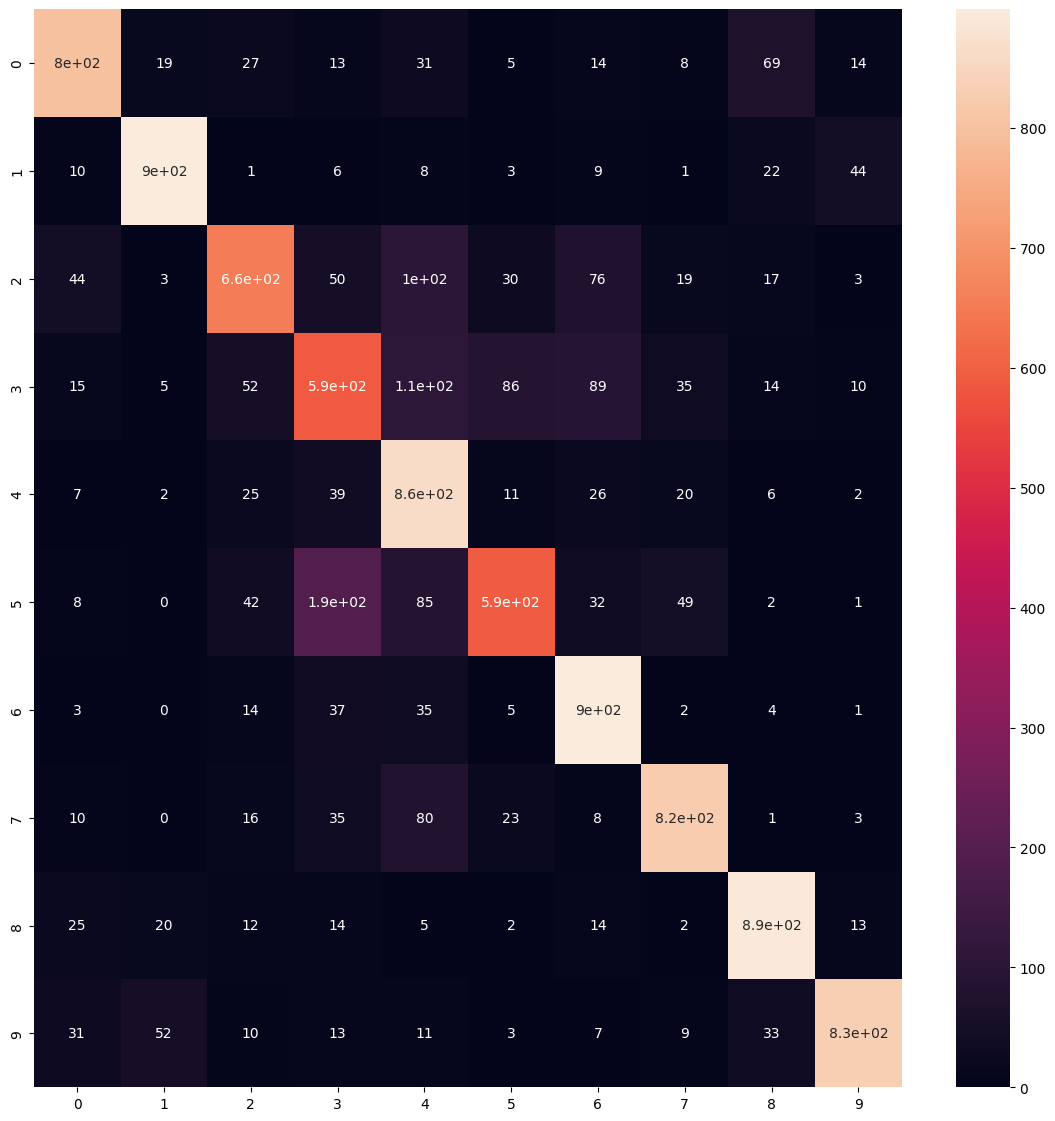

In [29]:
plt.figure(figsize=(14, 14))
sns.heatmap(cm, annot=True)

## Saving the Model

In [30]:
import os
directory = os.path.join(os.getcwd(), 'saved_models')
if not os.path.isdir(directory):
    os.makedirs(directory)
cnn_model.save('saved_models/cnn_model.keras')

## Image Augmentation

In [31]:
(X_train_aug, y_train_aug), (X_test_aug, y_test_aug) = cifar10.load_data()

In [32]:
X_train_aug = X_train_aug.astype('float32')
X_test_aug = X_test_aug.astype('float32')

In [33]:
X_train_aug.shape, X_test_aug.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [34]:
y_train_aug = keras.utils.to_categorical(y_train_aug, num_classes=10)
y_test_aug = keras.utils.to_categorical(y_test_aug, num_classes=10)

In [35]:
n = 24
X_train_sample = X_train_aug[:n]

In [36]:
datagen_train = ImageDataGenerator(
    rotation_range=90,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    brightness_range=(0.5, 1.5),
    fill_mode='nearest')
datagen_train.fit(X_train_sample)

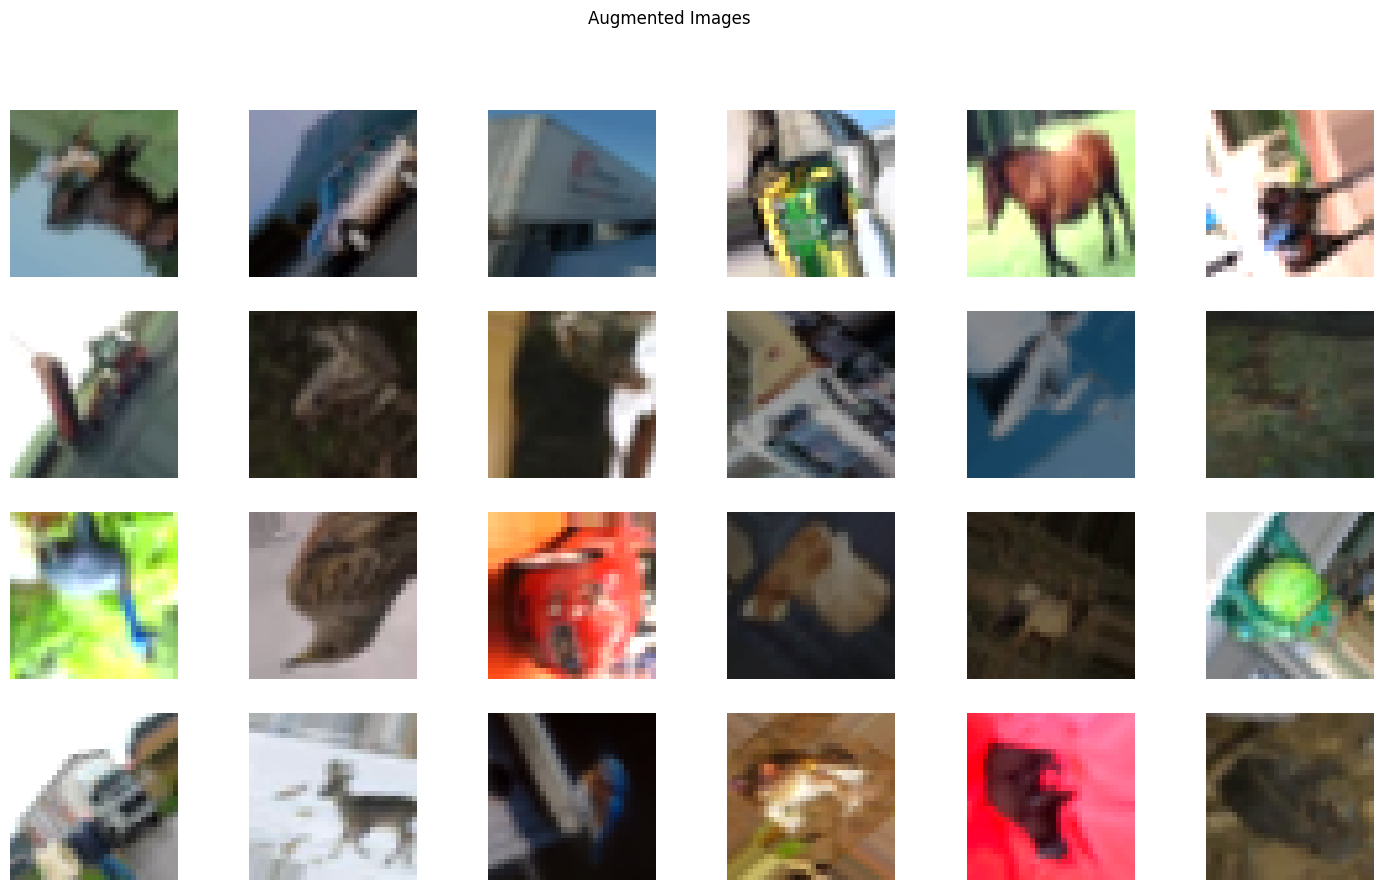

In [37]:
fig, axes = plt.subplots(4, 6, figsize=(18, 10))

for X_batch in datagen_train.flow(X_train_sample, batch_size=n):
  for i in range(4):
    for j in range(6):
      idx = i * 6 + j
      ax = axes[i, j]
      img = Image.fromarray((X_batch[idx]).astype('uint8'))
      ax.imshow(img)
      ax.axis('off')
  fig.suptitle('Augmented Images')
  plt.show()
  break

### Model retraining after Augmentation

In [38]:
  train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=15,
      width_shift_range=0.1,
      height_shift_range=0.1,
      # zoom_range=0.2,
      horizontal_flip=True,
      vertical_flip=True,
      # brightness_range=(0.5, 1.5),
      fill_mode='nearest')

  test_datagen = ImageDataGenerator(rescale=1./255)

  # train_datagen.fit(X_train)
  # test_datagen.fit(X_test)
  train_gen = train_datagen.flow(X_train, y_train_aug, batch_size=32)
  test_gen = test_datagen.flow(X_test, y_test_aug, batch_size=32)

  # datagen.fit(X_train)
  early_stopping = EarlyStopping(monitor='val_loss', patience=5)
  cnn_model.fit(train_gen, validation_data=test_gen, epochs=50, callbacks=[early_stopping])

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 34s 20ms/step - accuracy: 0.1146 - loss: 2.3387 - val_accuracy: 0.2011 - val_loss: 2.1928
Epoch 2/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 28s 18ms/step - accuracy: 0.2419 - loss: 2.0855 - val_accuracy: 0.3477 - val_loss: 1.8232
Epoch 3/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 28s 18ms/step - accuracy: 0.3102 - loss: 1.9058 - val_accuracy: 0.4072 - val_loss: 1.6745
Epoch 4/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 28s 18ms/step - accuracy: 0.3517 - loss: 1.8043 - val_accuracy: 0.4484 - val_loss: 1.5812
Epoch 5/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 28s 18ms/step - accuracy: 0.3748 - loss: 1.7457 - val_accuracy: 0.4042 - val_loss: 1.6960
Epoch 6/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 28s 18ms/step - accuracy: 0.3936 - loss: 1.6858 - val_accuracy: 0.4522 - val_loss: 1.5506
Epoch 7/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 28s 18ms/step - accuracy: 0.4182 - loss: 1.6298 - val_accuracy: 0.4640 - val_loss: 1.5152
Epoch 8/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 28s 18ms/step - accuracy: 0.4304 - loss: 1.59

In [41]:
score = cnn_model.evaluate(X_test, y_test_aug)
print('Test Accuracy : {}'.format(score))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2565 - loss: 175.7794
Test Accuracy : [176.91041564941406, 0.26089999079704285]


In [42]:
directory = os.path.join(os.getcwd(), 'saved_models')
if not os.path.isdir(directory):
    os.makedirs(directory)
cnn_model.save('saved_models/cnn_model_aug.keras')